## Decision Tree

Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex datasets. Apart from that, it is very easy to understand and read. That makes it more popular to use. When coupled with ensemble techniques – which we will learn very soon- it performs even better.
As the name suggests, this algorithm works by dividing the whole dataset into a tree-like structure based on some rules and conditions and then gives prediction based on those conditions.
Let’s understand the approach to decision tree with a basic scenario. 
Suppose it’s Friday night and you are not able to decide if you should go out or stay at home. Let the decision tree decide it for you.


<img src="Decision_tree1.PNG" width="300">
                         
Although we may or may not use the decision tree for such decisions, this was a basic example to help you understand how a decision tree makes a decision.
So how did it work?
*	It selects a root node based on a given condition, e.g. our root node was chosen as time >10 pm.
*	Then, the root node was split into child notes based on the given condition. The right child node in the above figure fulfilled the condition, so no more questions were asked.
*	The left child node didn’t fulfil the condition, so again it was split based on a new condition.
*	This process continues till all the conditions are met or if you have predefined the depth of your tree, e.g. the depth of our tree is 3, and it reached there when all the conditions were exhausted.

Let’s see how the parent nodes and condition is chosen for the splitting to work.

#### Decision Tree for Regression
When performing regression with a decision tree, we try to divide the given values of X into distinct and non-overlapping regions, e.g. for a set of possible values X1, X2,..., Xp; we will try to divide them into J distinct and non-overlapping regions R1, R2, . . . , RJ.
For a given observation falling into the region Rj, the prediction is equal to the mean of the response(y) values for each training observations(x) in the region Rj. 
The regions R1,R2, . . . , RJ  are selected in a way to reduce the following sum of squares of residuals :


<img src="formula1.PNG" width="300">
                                                        
Where, yrj (second term) is the mean of all the response variables in the region ‘j’.



#### Recursive binary splitting(Greedy approach)
As mentioned above, we try to divide the X values into j regions, but it is very expensive in terms of computational time to try to fit every set of X values into j regions. Thus, decision tree opts for a top-down greedy approach in which nodes are divided into two regions based on the given condition, i.e. not every node will be split but the ones which satisfy the condition are split into two branches. It is called greedy because it does the best split at a given step at that point of time rather than looking for splitting a step for a better tree in upcoming steps. It decides a threshold value(say s) to divide the observations into different regions(j) such that the RSS for Xj>= s and Xj <s is minimum.


<img src="formula2.PNG" width="400">
                      
Here for the above equation, j and s are found such that this equation has the minimum value.
The regions R1, R2 are selected based on that value of s and j such that the equation above has the minimum value.
Similarly, more regions are split out of the regions created above based on some condition with the same logic. This continues until a stopping criterion (predefined) is achieved.
Once all the regions are split, the prediction is made based on the mean of observations in that region.

The process mentioned above has a high chance of overfitting the training data as it will be very complex. 

#### Tree Pruning
Tree pruning is the method of trimming down a full tree (obtained through the above process) to reduce the complexity and variance in the data. Just as we regularised linear regression, we can also regularise the decision tree model by adding a new term. 


<img src="formula3.PNG" width="300">
                                       
Where, T  is the subtree which is a subset of the full tree T0
And α is the non-negative tuning parameter which penalises the MSE with an increase in tree length.
By using cross-validation, such values of α and T are selected for which our model gives the lowest test error rate.
This is how the decision tree regression model works. Let’s now see the working algorithm of doing classification using a decision tree.
Greedy Algorithm
As per Hands-on machine learning book “greedy algorithm greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.”


#### Post-pruning

Post-pruning, also known as backward pruning, is the process where the decision tree is generated first and then the non-significant branches are removed. Cross-validation set of data is used to check the effect of pruning and tests whether expanding a node will make an improvement or not. If any improvement is there then we continue by expanding that node else if there is reduction in accuracy then the node not be expanded and should be converted in a leaf node.


#### Pre-pruning

Pre-pruning, also known as forward pruning, stops the non-significant branches from generating. It uses a condition to decide when should it terminate splitting of some of the branches prematurely as the tree is generated. 


### Classification Trees

Regression trees are used for quantitative data. In the case of qualitative data or categorical data, we use classification trees.  In regression trees, we split the nodes based on RSS criteria, but in classification, it is done using classification error rate, Gini impurity and entropy.
Let’s understand these terms in detail.

#### Entropy
Entropy is the measure of randomness in the data. In other words, it gives the impurity present in the dataset.

<img src="entropy.PNG" width="300">
                                           
When we split our nodes into two regions and put different observations in both the regions, the main goal is to reduce the entropy i.e. reduce the randomness in the region and divide our data cleanly than it was in the previous node. If splitting the node doesn’t lead into entropy reduction, we try to split based on a different condition, or we stop. 
A region is clean (low entropy) when it contains data with the same labels and random if there is a mixture of labels present (high entropy).
Let’s suppose there are ‘m’ observations and we need to classify them into categories 1 and 2.
Let’s say that category 1 has ‘n’ observations and category 2 has ‘m-n’ observations.

p= n/m  and    q = m-n/m = 1-p

then, entropy for the given set is:


          E = -p*log2(p) – q*log2(q) 
           
           
When all the observations belong to category 1, then p = 1 and all observations belong to category 2, then p =0, int both cases E =0, as there is no randomness in the categories.
If half of the observations are in category 1 and another half in category 2, then p =1/2 and q =1/2, and the entropy is maximum, E =1.


<img src="entropy1.PNG" width="300">
                                  

#### Information Gain
Information gain calculates the decrease in entropy after splitting a node. It is the difference between entropies before and after the split. The more the information gain, the more entropy is removed. 

<img src="info_gain.PNG" width="300">

                                 
Where, T is the parent node before split and X is the split node from T.

A tree which is splitted on basis of entropy and information gain value looks like:

<img src="entropy_tree.PNG" width="900">

#### Ginni Impurity
According to wikipedia, ‘Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset.’
It is calculated by multiplying the probability that a given observation is classified into the correct class and sum of all the probabilities when that particular observation is classified into the wrong class.
Let’s suppose there are k number of classes and an observation belongs to the class ‘i’, then Ginni impurity is given as:

 
Ginni impurity value lies between 0 and 1, 0 being no impurity and 1 denoting random distribution.
The node for which the Ginni impurity is least is selected as the root node to split.




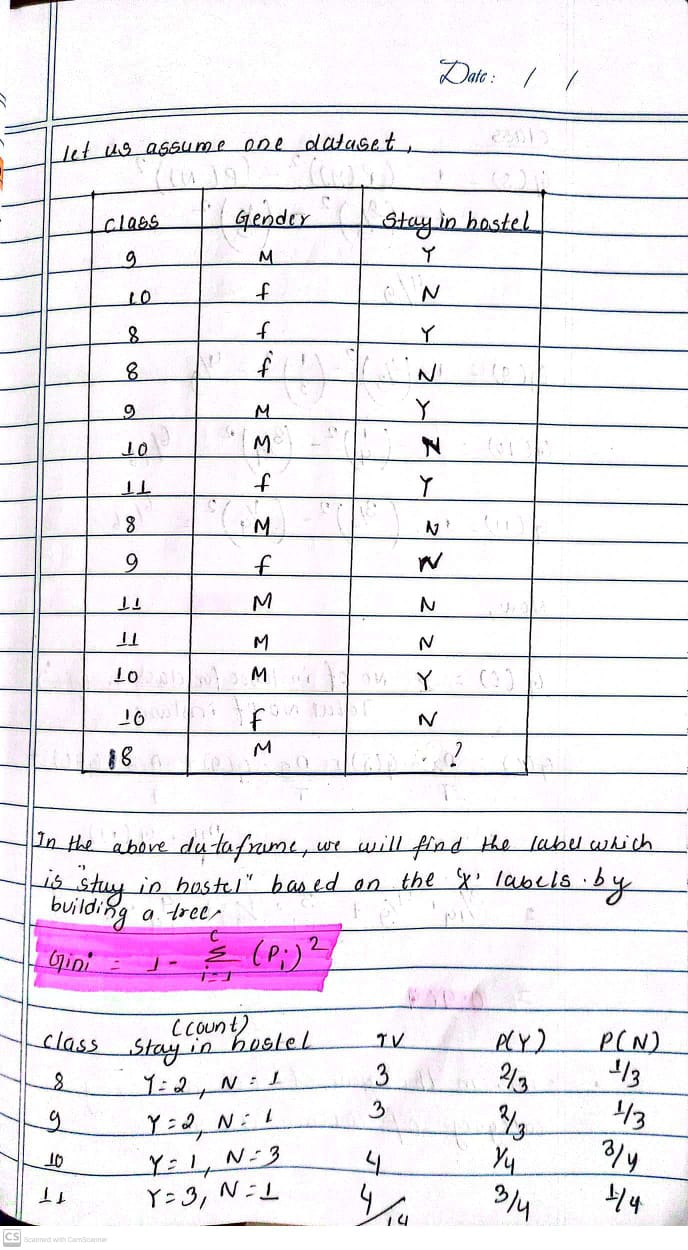

In [1]:
from IPython.display import Image

Image(filename="WhatsApp Image 2023-10-11 at 18.50.41_36e9fa63.jpg")
                                   

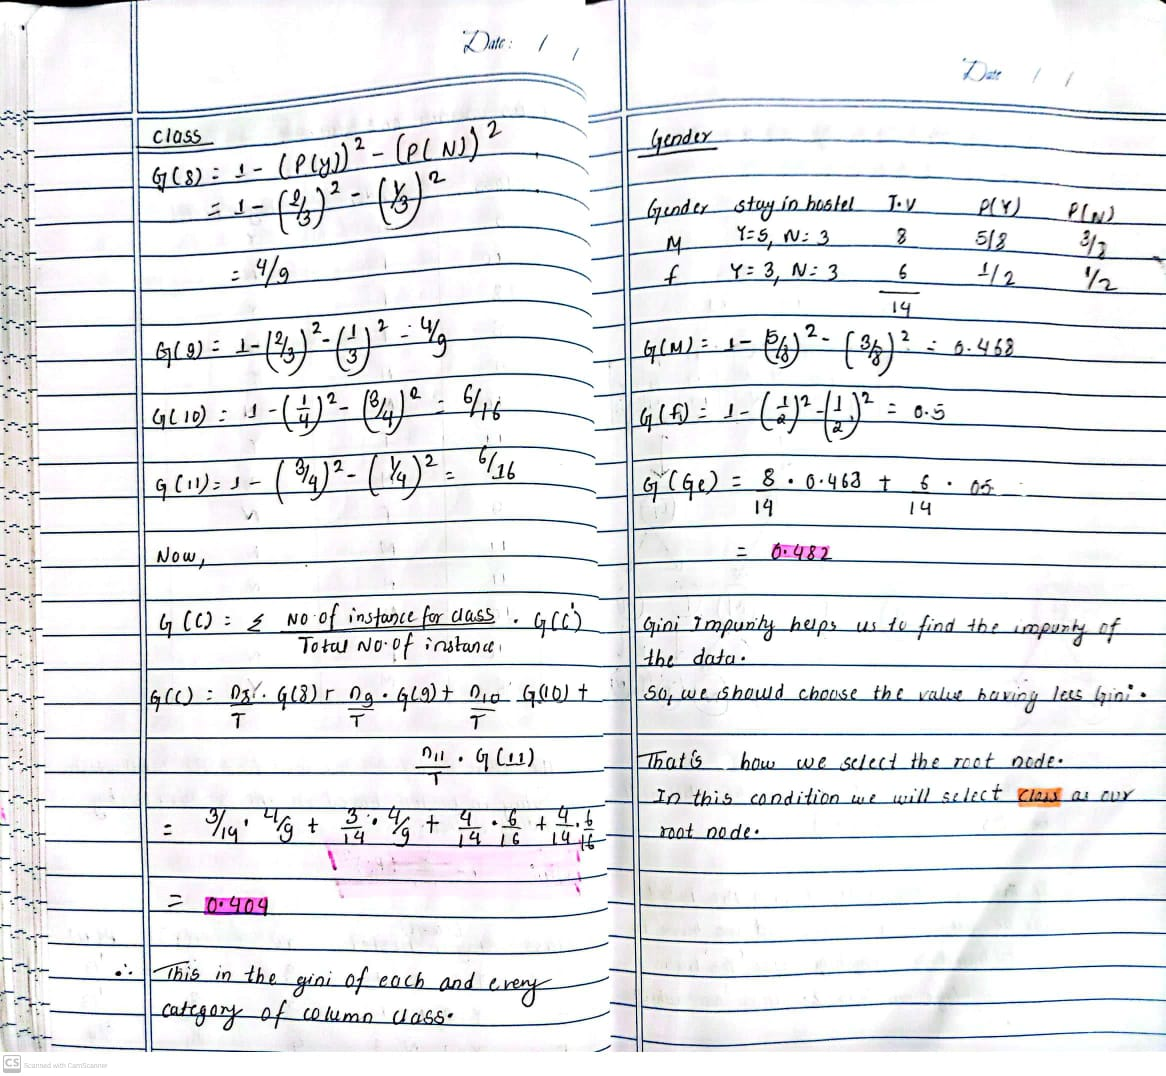

In [2]:
Image(filename="WhatsApp Image 2023-10-11 at 18.50.43_4d75ab75.jpg")

### Maths behind Decision Tree Classifier
Before we see the python implementation of decision tree. let's first understand the math behind the decision tree classfication. We will see how all the above mentioned terms are used for splitting.

We will use a simple dataset which contains information about students of different classes and gender and see whether they stay in school's hostel or not.

Let's try and understand how the root node is selected by calcualting gini impurity. We will use the above mentioned data.

We have two features which we can use for nodes: "Class" and "Gender".
We will calculate gini impurity for each of the features and then select that feature which has least gini impurity.

Let's review the formula for calculating ginni impurity:


This is how our Decision tree node is selected by calculating gini impurity for each node individually.
If the number of feautures increases, then we just need to repeat the same steps after the selection of the root node.

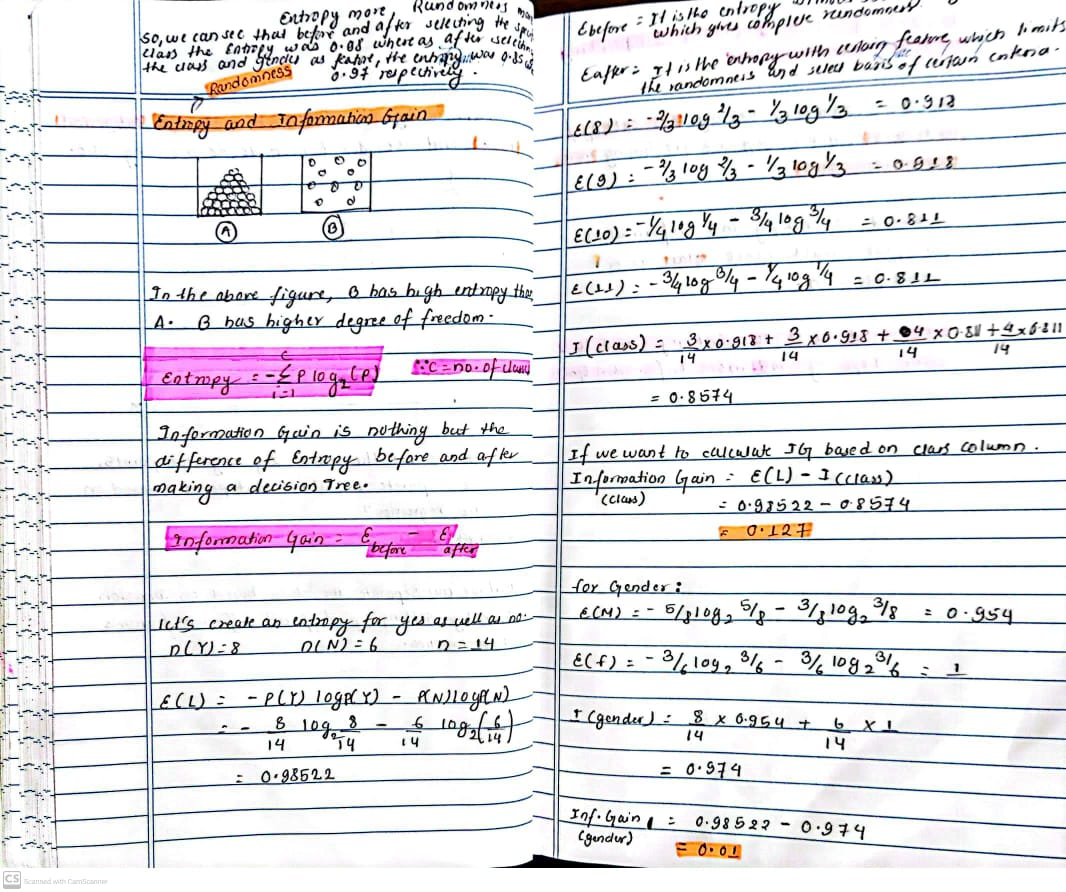

In [3]:
Image(filename="Entropy.jpg")

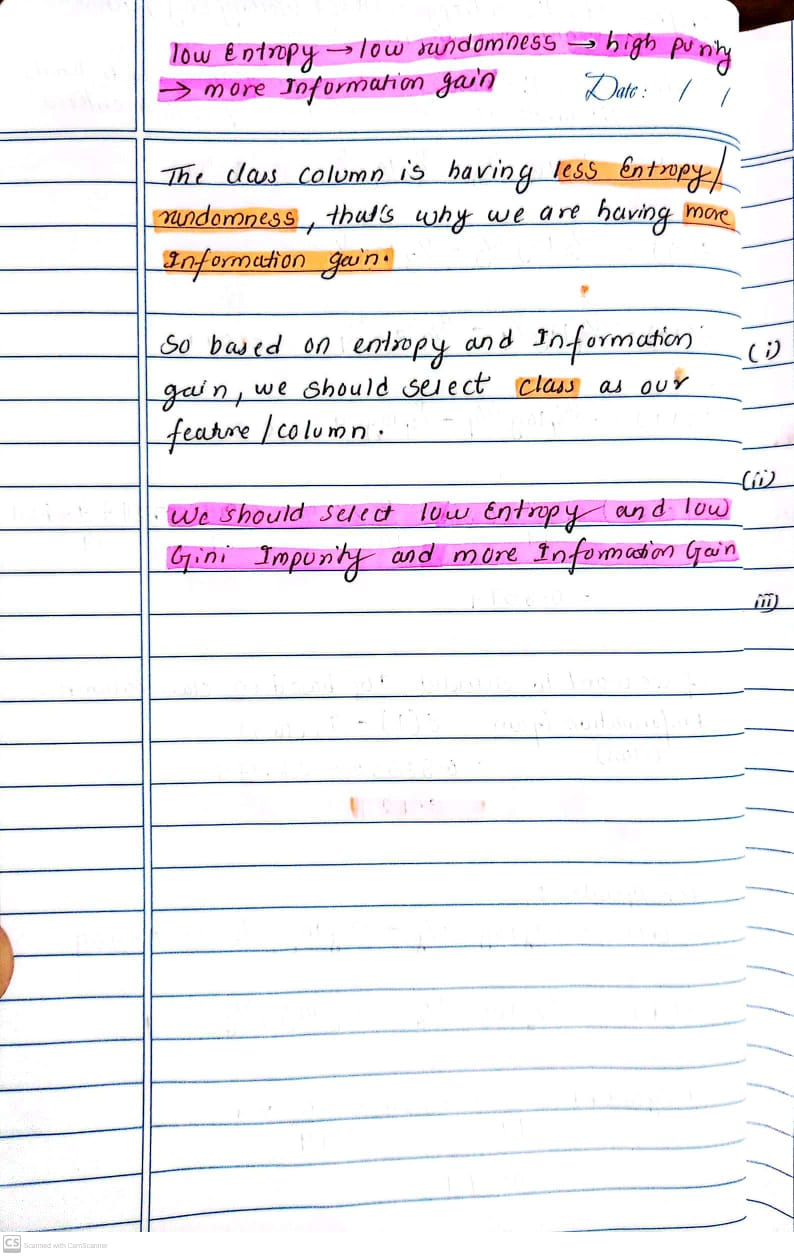

In [4]:
Image(filename="Entropy..jpg")

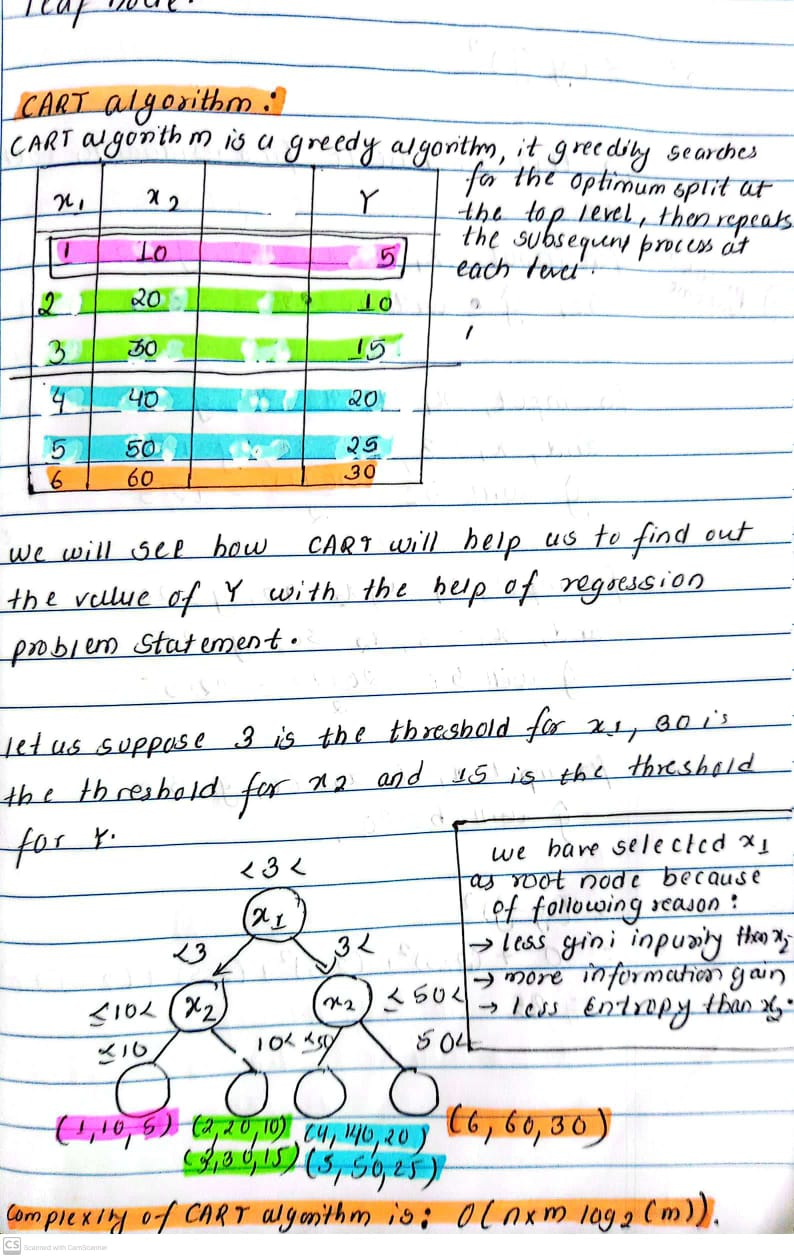

In [5]:
Image(filename="CART.jpg")

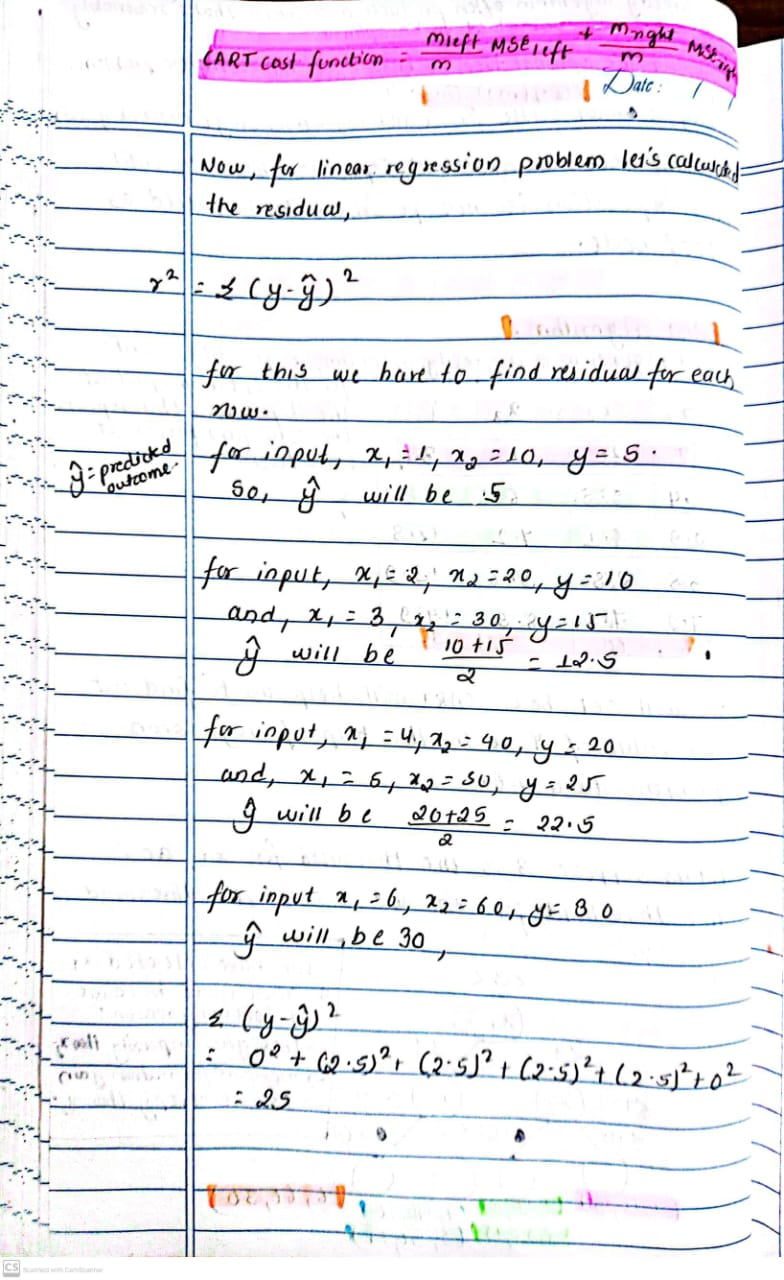

In [6]:
Image(filename="CART..jpg")

### Different Algorithms for Decision Tree


* ID3 (Iterative Dichotomiser) : It is one of the algorithms used to construct decision tree for classification. It uses Information gain as the criteria for finding the root nodes and splitting them. It only accepts categorical attributes.

* C4.5 : It is an extension of ID3 algorithm, and better than ID3 as it deals both continuous and discreet values.It is also used for classfication purposes.


* Classfication and Regression Algorithm(CART) : It is the most popular algorithm used for constructing decison trees. It uses ginni impurity as the default calculation for selecting root nodes, however one can use "entropy" for criteria as well. This algorithm works on both regression as well as classfication problems. We will use this algorithm in our pyhton implementation. 


Entropy and Ginni impurity can be used reversibly. It doesn't affects the result much. Although, ginni is easier to compute than entropy, since entropy has a log term calculation. That's why CART algorithm uses ginni as the default algorithm.

If we plot ginni vs entropy graph, we can see there is not much difference between them:



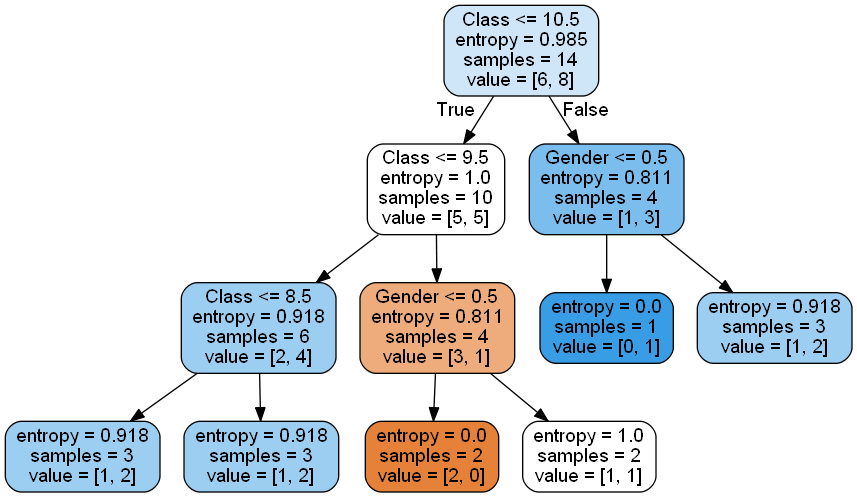

In [7]:
Image(filename="mytree.png")

##### Advantages of Decision Tree:

   * It can be used for both Regression and Classification problems.
   * Decision Trees are very easy to grasp as the rules of splitting is clearly mentioned.
   * Complex decision tree models are very simple when visualized. It can be understood just by visualising.
   * Scaling and normalization are not needed.


##### Disadvantages of Decision Tree:


   * A small change in data can cause instability in the model because of the greedy approach.
   * Probability of overfitting is very high for Decision Trees.
   * It takes more time to train a decision tree model than other classification algorithms.